In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load the data set

In [2]:
df=pd.read_csv(r'D:\data sets\application_data.csv')

# check the structure and data types of data 

In [3]:
df.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
df.dtypes

SK_ID_CURR                     int64
TARGET                        object
NAME_CONTRACT_TYPE            object
CODE_GENDER                   object
FLAG_OWN_CAR                  object
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY     object
AMT_REQ_CREDIT_BUREAU_WEEK    object
AMT_REQ_CREDIT_BUREAU_MON     object
AMT_REQ_CREDIT_BUREAU_QRT     object
AMT_REQ_CREDIT_BUREAU_YEAR    object
Length: 73, dtype: object

In [4]:
df.info(-1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [5]:
df.shape

(307511, 122)

# check the null values per columns

In [6]:
df.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

# # DATA CLEANING BY (HANDLING MISSING VALUES AND OUTLIERS)

 % of null values sorting in decending order

In [3]:
100*(df.isnull().mean()).sort_values(ascending=False)

COMMONAREA_MEDI             69.872297
COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_AVG     69.432963
                              ...    
NAME_HOUSING_TYPE            0.000000
NAME_FAMILY_STATUS           0.000000
NAME_EDUCATION_TYPE          0.000000
NAME_INCOME_TYPE             0.000000
SK_ID_CURR                   0.000000
Length: 122, dtype: float64

#drop the columns having null vales morethan 40%

In [4]:
cols_to_drop=df.columns[100*df.isnull().mean()>40]
df=df.drop(cols_to_drop,axis=1)

# check the shape after dropping the columns

In [5]:
df.shape

(307511, 73)

# no of columns drop

In [10]:
len(cols_to_drop)

49

# check the null value after dropping the columns in decending order

In [11]:
df.isnull().sum().sort_values(ascending=False)

OCCUPATION_TYPE                96391
EXT_SOURCE_3                   60965
AMT_REQ_CREDIT_BUREAU_YEAR     41519
AMT_REQ_CREDIT_BUREAU_QRT      41519
AMT_REQ_CREDIT_BUREAU_MON      41519
                               ...  
REG_REGION_NOT_LIVE_REGION         0
REG_REGION_NOT_WORK_REGION         0
LIVE_REGION_NOT_WORK_REGION        0
TARGET                             0
REG_CITY_NOT_LIVE_CITY             0
Length: 73, dtype: int64

# cleaning

As we see this column has '1292' nan values,dropping these null values is not a good idea in the point
of view of analysis, we can categorize these null values in 'missing' category

In [6]:
df['NAME_TYPE_SUITE'].unique()
df['NAME_TYPE_SUITE'].isnull().sum()
df['NAME_TYPE_SUITE'].replace(np.nan,'missing',inplace=True)

same procedure we follow with this column also
have '60965' null values

In [7]:
df['EXT_SOURCE_3'].isnull().sum()

df['EXT_SOURCE_3'].replace(np.nan,'missing',inplace=True)

replace 'nan' with 'missing' 

In [14]:
df['EXT_SOURCE_3'].value_counts()

missing               60965
0.746300213050371      1460
0.7136313997323308     1315
0.6940926425266661     1276
0.6706517530862718     1191
                      ...  
0.0286744530870526        1
0.0252715002135269        1
0.0214915157350364        1
0.0145563649297115        1
0.0432265239224614        1
Name: EXT_SOURCE_3, Length: 815, dtype: int64

Replace 'nan' with 'missing' 

In [8]:
df['AMT_REQ_CREDIT_BUREAU_HOUR']=df['AMT_REQ_CREDIT_BUREAU_HOUR'].replace(np.nan,'missing')
df['AMT_REQ_CREDIT_BUREAU_DAY']=df['AMT_REQ_CREDIT_BUREAU_DAY'].replace(np.nan,'missing')
df['AMT_REQ_CREDIT_BUREAU_WEEK']=df['AMT_REQ_CREDIT_BUREAU_WEEK'].replace(np.nan,'missing')
df['AMT_REQ_CREDIT_BUREAU_MON']=df['AMT_REQ_CREDIT_BUREAU_MON'].replace(np.nan,'missing')
df['AMT_REQ_CREDIT_BUREAU_QRT']=df['AMT_REQ_CREDIT_BUREAU_QRT'].replace(np.nan,'missing')
df['AMT_REQ_CREDIT_BUREAU_YEAR']=df['AMT_REQ_CREDIT_BUREAU_YEAR'].replace(np.nan,'missing')

Replace '96391' nan with 'missing'

In [9]:
df['OCCUPATION_TYPE'].isnull().sum()
df['OCCUPATION_TYPE'].replace(np.nan,'missing',inplace=True)

# Check for the outliers

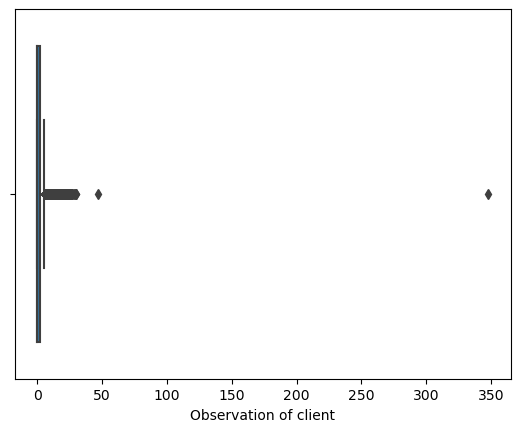

In [21]:
sns.boxplot(x=df['OBS_30_CNT_SOCIAL_CIRCLE'])
plt.xlabel('Observation of client')
plt.show()

# Remove the outliers

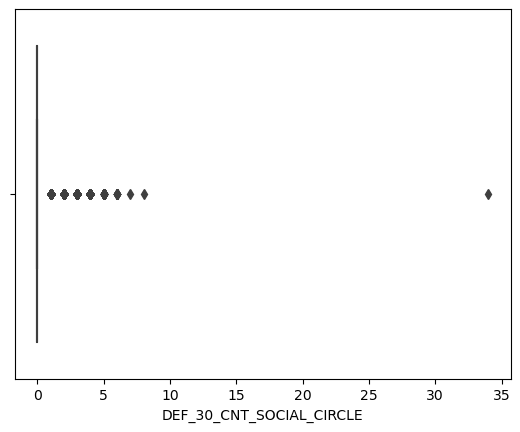

In [22]:
sns.boxplot(x=df['DEF_30_CNT_SOCIAL_CIRCLE'])
plt.show() 
for i in df.index:
    if df.loc[i,'DEF_30_CNT_SOCIAL_CIRCLE']>30.0:
        df.drop(i,inplace=True)

# ANALYSE THE DATA

WHAT type of occupation does the client have shown by countplot

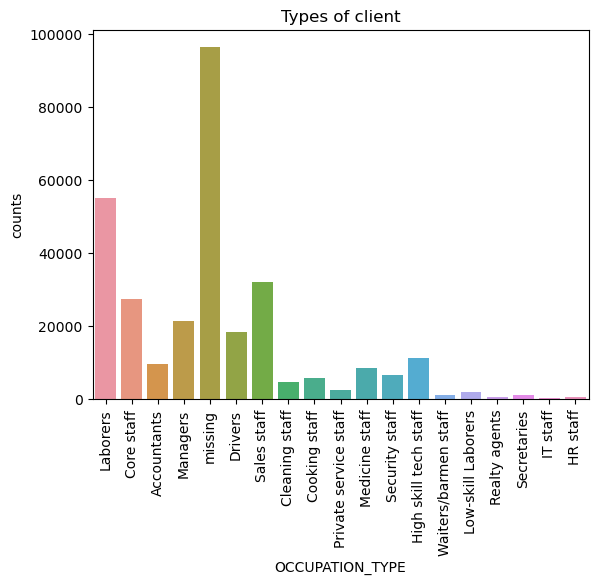

In [18]:
sns.countplot(df,x='OCCUPATION_TYPE')
plt.xticks(rotation=90)
plt.ylabel('counts')
plt.title('Types of client')
plt.show()

IN THIS COLUMN 0 represent (good client),1 represent (defaulters)
this graph shows very less no of defaulters

In [10]:
df['TARGET'].replace(0,'Good_clients',inplace=True)
df['TARGET'].replace(1,'Defaulters',inplace=True)

In [11]:
freq_target=100*df["TARGET"].value_counts(normalize=True)

# % of target variable

In [12]:
freq_target

Good_clients    91.927118
Defaulters       8.072882
Name: TARGET, dtype: float64

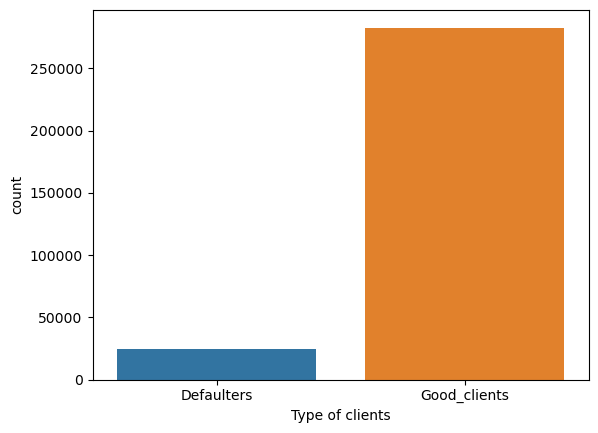

In [13]:
sns.countplot(df,x='TARGET')
plt.xlabel('Type of clients')
plt.ylabel('count')
plt.show()

# Univariate Analysis

This column identifying  if loan is cash or revolving 

In [27]:
df['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         278232
Revolving loans     29278
Name: NAME_CONTRACT_TYPE, dtype: int64

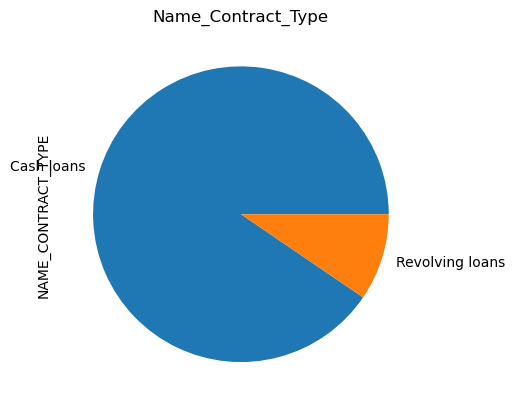

In [28]:
df['NAME_CONTRACT_TYPE'].value_counts().plot.pie()
plt.title('Name_Contract_Type')
plt.show()

# Check for old client and new clients

In [3]:
df1=pd.read_csv(r'D:\data sets\previous_application (1).csv')

# create a temporary data frame having only previous application client 

In [4]:
df3=df1[['SK_ID_CURR']].drop_duplicates()

In [5]:
df3['flag']='prev_client'

In [6]:
df3

,SK_ID_CURR,flag
0,271877,prev_client
1,108129,prev_client
2,122040,prev_client
3,176158,prev_client
4,202054,prev_client
...,...,...
1669619,239799,prev_client
1669655,174832,prev_client
1669726,253940,prev_client
1669862,353284,prev_client


# create a new_dataframe  named 'df_new' by merging two data frame 
# to get the flag of old v/s new clients

In [7]:
df_new=df.merge(df3,on='SK_ID_CURR',how='left')

# Add one new column name 'flag' which indicate previous clients and new clients

In [8]:
df_new.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,flag
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,prev_client
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,prev_client
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,prev_client
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,prev_client
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,prev_client


In [18]:
df_new.shape

(307511, 74)

In [19]:
df.shape

(307511, 73)

In [20]:
df_new['flag']=df_new['flag'].replace(np.nan,'new_client')

In [22]:
df_new['flag'].unique()

array(['prev_client', 'new_client'], dtype=object)

# % of new_client and previous_client in df_new

In [21]:
freq_flag=round(100*(df_new['flag'].value_counts())/len(df_new.index),2)

In [23]:
freq_flag

prev_client    94.65
new_client      5.35
Name: flag, dtype: float64

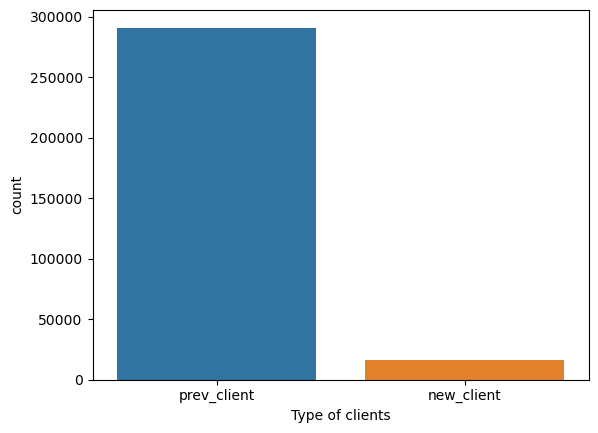

In [45]:
sns.countplot(df_new,x='flag')
plt.xlabel('Type of clients')
plt.ylabel('count')
plt.show()

In [36]:
df['CODE_GENDER'].replace('XNA','not known',inplace=True)
df['CODE_GENDER'].replace('F','Female',inplace=True)
df['CODE_GENDER'].replace('M','Male',inplace=True)

# Number of males and female clients

In [70]:
df['CODE_GENDER'].value_counts()

Female       202448
Male         105058
not known         4
Name: CODE_GENDER, dtype: int64

# % of male and female clients

In [71]:
100*(df['CODE_GENDER'].value_counts()/len(df.index))

Female       65.834607
Male         34.164092
not known     0.001301
Name: CODE_GENDER, dtype: float64

In [41]:
male=df[df['CODE_GENDER']=='Male']['CODE_GENDER']

In [42]:
male

0         Male
2         Male
4         Male
5         Male
7         Male
          ... 
307492    Male
307494    Male
307495    Male
307498    Male
307506    Male
Name: CODE_GENDER, Length: 105059, dtype: object

In [37]:
female=df[df['CODE_GENDER']=='Female']['CODE_GENDER']

In [38]:
female

1         Female
3         Female
6         Female
8         Female
10        Female
           ...  
307505    Female
307507    Female
307508    Female
307509    Female
307510    Female
Name: CODE_GENDER, Length: 202448, dtype: object

#  BIVARIATE ANALYSIS

Text(0, 0.5, 'Loan annuity')

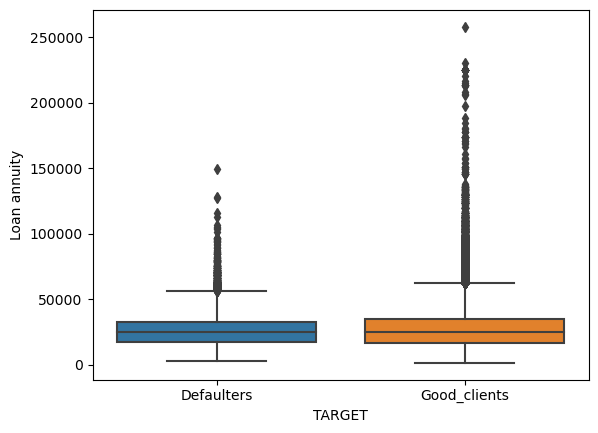

In [75]:
sns.boxplot(x=df["TARGET"],y=df['AMT_ANNUITY'])
plt.ylabel('Loan annuity')

# Segmented Univariate Analysis

# temp0 shows how many good_clients are there  in df

In [76]:
temp0=df[df["TARGET"]=='Good_clients']

In [77]:
temp0

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,freq_target
1,100003,Good_clients,Cash loans,Female,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,100004,Good_clients,Revolving loans,Male,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,100006,Good_clients,Cash loans,Female,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,missing,missing,missing,missing,missing,missing,NaN
4,100007,Good_clients,Cash loans,Male,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
5,100008,Good_clients,Cash loans,Male,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307505,456249,Good_clients,Cash loans,Female,N,Y,0,112500.0,225000.0,22050.0,...,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0,NaN
307506,456251,Good_clients,Cash loans,Male,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,missing,missing,missing,missing,missing,missing,NaN
307507,456252,Good_clients,Cash loans,Female,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,missing,missing,missing,missing,missing,missing,NaN
307508,456253,Good_clients,Cash loans,Female,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0,NaN


In [78]:
temp1=df[df["TARGET"]=='Defaulters']

# temp1 shows how many defaulters are there in df

In [79]:
temp1['TARGET'].value_counts()

Defaulters    24825
Name: TARGET, dtype: int64

# Defalters having income less than 20000

In [80]:
defalter=temp1[temp1['AMT_ANNUITY']<20000]
defalter['TARGET'].value_counts()

Defaulters    8084
Name: TARGET, dtype: int64

In [81]:
defa=temp1[temp1['AMT_ANNUITY']<10000]
defa['TARGET'].value_counts()

Defaulters    1650
Name: TARGET, dtype: int64

# Male Defalters and female dafalters

In [82]:
defa_male=temp1[temp1['CODE_GENDER']=='Male']

In [83]:
defa_male

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,freq_target
0,100002,Defaulters,Cash loans,Male,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
40,100047,Defaulters,Cash loans,Male,N,Y,0,202500.0,1193580.0,35028.0,...,0,0,0,0.0,0.0,0.0,2.0,0.0,4.0,NaN
94,100112,Defaulters,Cash loans,Male,Y,Y,0,315000.0,953460.0,64107.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,NaN
138,100160,Defaulters,Cash loans,Male,N,Y,0,292500.0,675000.0,36747.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
180,100209,Defaulters,Revolving loans,Male,N,Y,3,180000.0,540000.0,27000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307433,456171,Defaulters,Cash loans,Male,N,Y,0,50400.0,113760.0,7731.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0,NaN
307438,456176,Defaulters,Cash loans,Male,N,Y,0,171000.0,1436850.0,42142.5,...,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0,NaN
307446,456184,Defaulters,Cash loans,Male,N,N,0,270000.0,900000.0,40671.0,...,0,0,0,missing,missing,missing,missing,missing,missing,NaN
307448,456186,Defaulters,Cash loans,Male,N,N,1,207000.0,450000.0,32746.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,NaN


In [84]:
defa_male['CODE_GENDER'].value_counts()

Male    10655
Name: CODE_GENDER, dtype: int64

# Check for duplicacy

In [85]:
df['duplicated']=df.duplicated(subset=['SK_ID_CURR'])

In [86]:
df['duplicated']

0         False
1         False
2         False
3         False
4         False
          ...  
307506    False
307507    False
307508    False
307509    False
307510    False
Name: duplicated, Length: 307510, dtype: bool

# this graph represent the defaulters w.r.t amt_annuity

<Axes: xlabel='AMT_ANNUITY', ylabel='Count'>

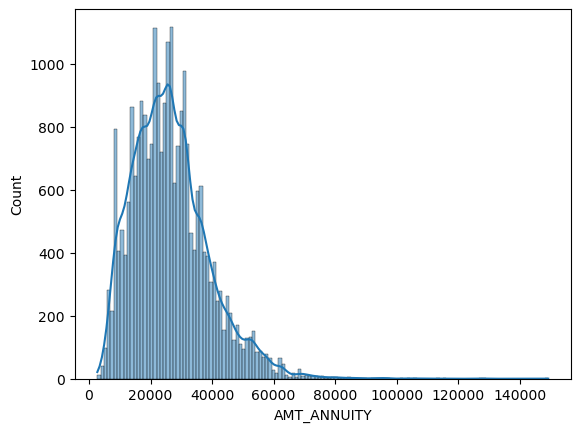

In [88]:
sns.histplot(data=temp1["AMT_ANNUITY"],kde=True)

# this graph represent the good client w.r.t 'amt_annuity

<Axes: xlabel='AMT_ANNUITY', ylabel='Count'>

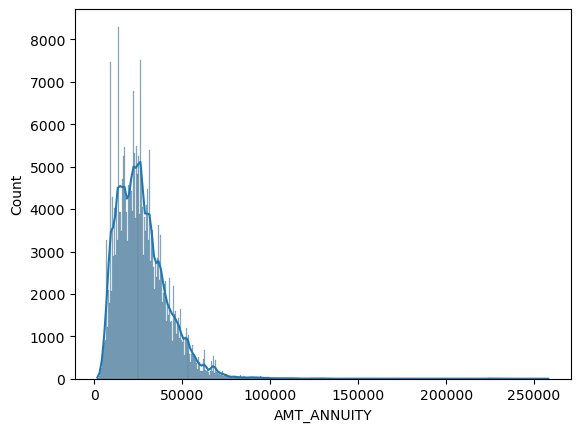

In [89]:
sns.histplot(data=temp0["AMT_ANNUITY"],kde=True)

# Multivariate Analysis

# this graph shows the relationship b/w multiple variable 
# it shows whether they have positive relation and negative relation

C:\Users\Sony\AppData\Local\Temp\ipykernel_11660\2159034145.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df[["AMT_ANNUITY","AMT_INCOME_TOTAL","AMT_CREDIT","AMT_GOODS_PRICE","TARGET"]].corr(),annot=True)


<Axes: >

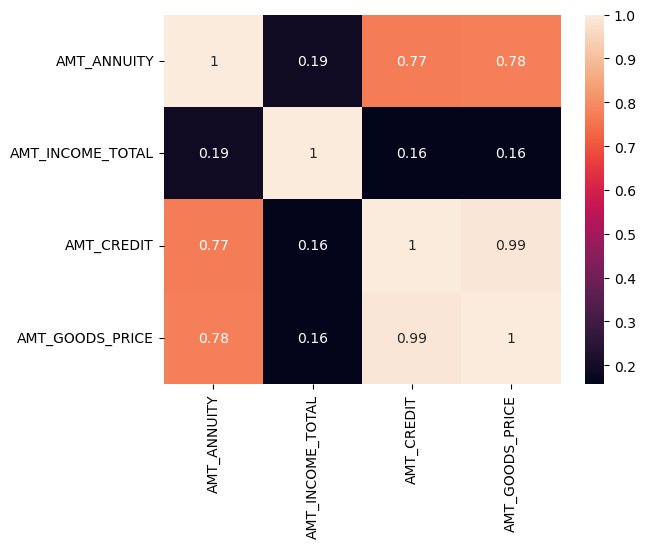

In [92]:
sns.heatmap(df[["AMT_ANNUITY","AMT_INCOME_TOTAL","AMT_CREDIT","AMT_GOODS_PRICE","TARGET"]].corr(),annot=True)

# Load  Second data set i.e previous application

In [2]:
df1=pd.read_csv(r'D:\data sets\previous_application (1).csv')

In [43]:
df1

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,...,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,...,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,...,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


# check the structure and data types of data

In [44]:
df1.shape

(1670214, 37)

In [6]:
df1.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

# Check for null values

In [3]:
(((df1.isnull().sum())/len(df1.index))*100).sort_values(ascending=False)

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
AMT_DOWN_PAYMENT               53.636480
RATE_DOWN_PAYMENT              53.636480
NAME_TYPE_SUITE                49.119754
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_FIRST_DRAWING             40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_YIELD_GROUP                0.000000
NAME_PORTFOLIO                  0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
SK_ID_PREV                      0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE

# Drop the columns having more then 40 % null values 

In [46]:
cols_to_drop=df1.columns[100*df1.isnull().mean()>40]
df1=df1.drop(cols_to_drop,axis=1)

# Shape of data frame after removing the  columns

In [47]:
df1.shape

(1670214, 26)

# Analyse the data

In [48]:
df1['NAME_CONTRACT_STATUS'].unique()

array(['Approved', 'Refused', 'Canceled', 'Unused offer'], dtype=object)

<Axes: xlabel='NAME_CONTRACT_STATUS', ylabel='count'>

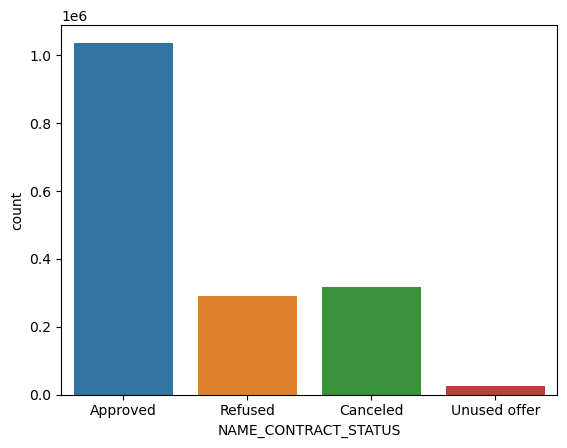

In [49]:
sns.countplot(df1,x='NAME_CONTRACT_STATUS')

In [50]:
df1['FLAG_LAST_APPL_PER_CONTRACT'].unique()

array(['Y', 'N'], dtype=object)

In [51]:
df1['FLAG_LAST_APPL_PER_CONTRACT'].replace('Y','YES',inplace=True)
df1['FLAG_LAST_APPL_PER_CONTRACT'].replace('N','NO',inplace=True)


In [52]:
df1['FLAG_LAST_APPL_PER_CONTRACT'].unique()

array(['YES', 'NO'], dtype=object)

In [53]:
df1['NAME_CLIENT_TYPE'].unique()

array(['Repeater', 'New', 'Refreshed', 'XNA'], dtype=object)

<Axes: xlabel='NAME_CLIENT_TYPE', ylabel='count'>

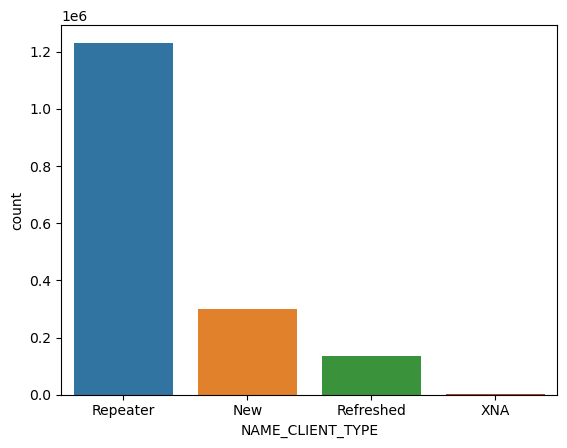

In [54]:
sns.countplot(df1,x='NAME_CLIENT_TYPE')

# variable 'a' store the details of new clients with 'amt_annuity'<1000

In [55]:
a=df1[(df1['AMT_ANNUITY']<1000) & (df1['NAME_CLIENT_TYPE']=='New')]

In [57]:
a['NAME_CONTRACT_STATUS'].value_counts()

Approved    324
Refused       6
Name: NAME_CONTRACT_STATUS, dtype: int64

In [3]:
df1['NAME_CONTRACT_STATUS'].value_counts()

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

# % of applications approved,canceled,refused

In [5]:
round(100*(df1['NAME_CONTRACT_STATUS'].value_counts()/len(df1.index)),2)

Approved        62.07
Canceled        18.94
Refused         17.40
Unused offer     1.58
Name: NAME_CONTRACT_STATUS, dtype: float64

<Axes: xlabel='NAME_CONTRACT_STATUS', ylabel='count'>

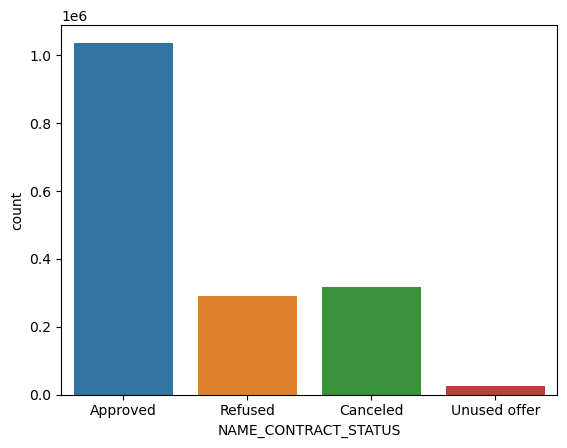

In [7]:
sns.countplot(df1,x='NAME_CONTRACT_STATUS')

In [13]:
approved=df1[df1['NAME_CONTRACT_STATUS']=='Approved']

In [14]:
approved

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,NaN,315000.0,SATURDAY,8,...,XNA,18.0,low_normal,Cash X-Sell: low,365243.0,-654.0,-144.0,-144.0,-137.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,...,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,...,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,...,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


In [60]:
refused=df1[df1['NAME_CONTRACT_STATUS']=='Refused']

In [61]:
canceled=df1[df1['NAME_CONTRACT_STATUS']=='Canceled']

# Group by 

In [64]:
result = df1.groupby('NAME_CONTRACT_STATUS')

In [65]:
result.first()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
NAME_CONTRACT_STATUS,,,,,,,,,,,,,,,,,,,,,
Approved,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,YES,...,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
Canceled,2315218,175704,Cash loans,44673.390,0.0,0.0,540396.0,TUESDAY,11,YES,...,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,18.0,XNA,Cash
Refused,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,YES,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high
Unused offer,1366380,247572,Consumer loans,13692.105,17950.5,17950.5,17950.5,MONDAY,19,YES,...,Repeater,Mobile,XNA,XNA,Country-wide,25,Connectivity,10.0,XNA,POS mobile with interest
